In [ ]:
import numpy as np 
import pandas as pd 
import os

In [ ]:
fake=pd.read_csv("/content/Fake.csv")
true=pd.read_csv("/content/True.csv")

In [ ]:
fake["category"]=1
true["category"]=0

In [ ]:
df=pd.concat([fake,true]).reset_index(drop=True)

In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [ ]:
true['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [ ]:
print(true.isnull().sum())

title       0
text        0
subject     0
date        0
category    0
dtype: int64


In [ ]:
print(fake.isnull().sum())

title       0
text        0
subject     0
date        0
category    0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

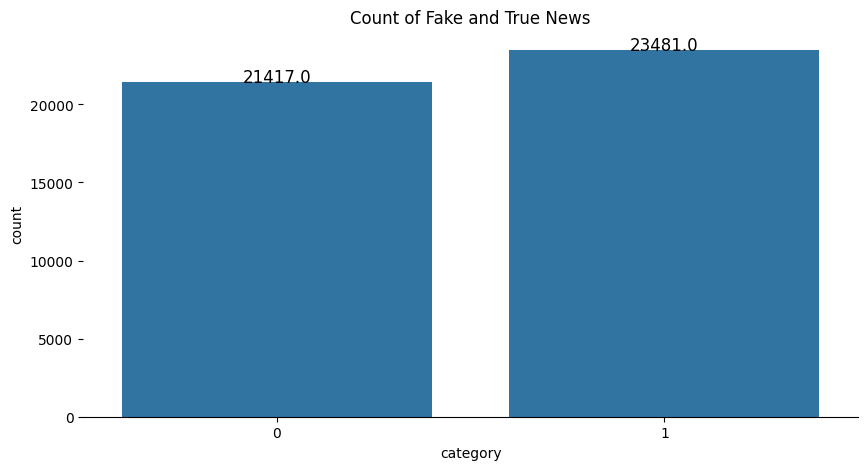

In [ ]:
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [ ]:
print(df.columns)

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')


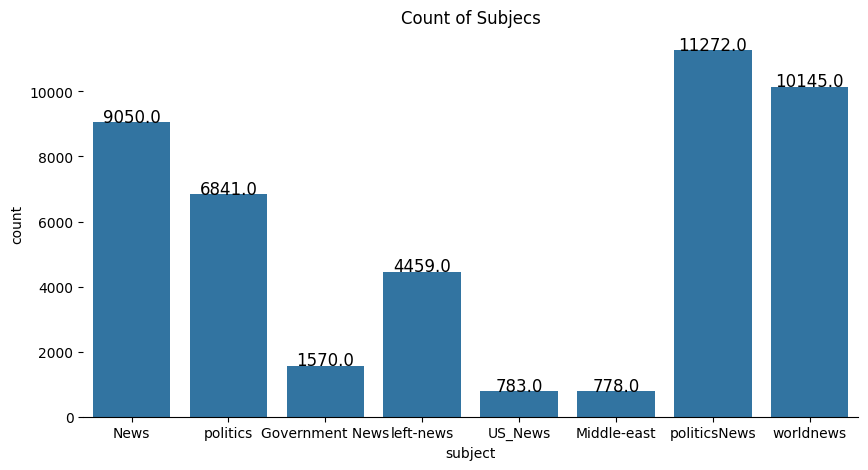

In [ ]:
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="subject", data=df)
plt.title("Count of Subjecs")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)

In [ ]:
df=df[['text','category']]

In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
blanks = []

for index, text in df["text"].items():  # .items() is preferred over .iteritems() in recent pandas
    if pd.isna(text) or text.strip() == "":
        blanks.append(index)

len(blanks)


631

In [ ]:
df['text'].head()

,text
0,donald trump just couldn t wish all americans ...
1,house intelligence committee chairman devin nu...
2,"on friday, it was revealed that former milwauk..."
3,"on christmas day, donald trump announced that ..."
4,pope francis used his annual christmas day mes...


In [ ]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

,0
text,0.0
category,0.0


In [ ]:
df["text"][10912]

'before trump, democrats and their allies in the leftist media rarely had to worry about being called out for their hypocrisy. first of all, there wasn t an opposing voice in the media and politicians in the republican party, most especially the president of the united states, certainly weren t going to call them out. before donald j. trump, republicans were under the false impression that they needed the press in their corner. that was before donald j. trump shattered the old rules that protected the media class from scrutiny and allowed them to fully control the narrative.fortunately for every american, there s a new sheriff in town, who is hell-bent on holding democrats and the leftist media s feet to the fire when it comes to their hypocrisy. president trump posted this hilarious video to twitter yesterday that has already received over 77k  likes .president trump tweeted this message yesterday:dems have been complaining for months & months about dir. comey. now that he has been fi

In [ ]:
df["text"][10923]

' '

In [ ]:
df.shape

(44898, 2)

In [ ]:
df.drop(blanks,inplace=True)

In [ ]:
df.shape

(44267, 2)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

In [ ]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
198
401


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def clean_text(text):
    """
    It takes text as input and cleans it by applying several methods
    """
    string = ""

    # Lowercasing
    text = text.lower()

    # Simplifying contractions
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)

    # Removing special characters and extra spaces
    text = re.sub(r"[-()\"#!@$%^&*{}?.,:]", " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text)

    for word in text.split():
        if word not in stop_words:
            string += lemma.lemmatize(word) + " "

    return string.strip()


In [ ]:
df["text"][10]

"a centerpiece of donald trump s campaign, and now his presidency, has been his white supremacist ways. that is why so many of the public feuds he gets into involve people of color. one of his favorite targets, is, of course, the players in the national football league who dare to exercise their first amendment rights by kneeling during the national anthem in protest of racist police brutality. well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: the founder of the pizza chain papa john s.this is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. but, when he decided to complain about the players protesting, his sales really dropped. turns out racism doesn t pay, and we all know that corporations are all about the bottom line. therefore, papa john schnatter will no longer be ceo of the hack pizza chain.breaking: papa john's founder john schnatter to step down 

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df["text"]=df["text"].apply(clean_text)

In [ ]:
df["text"]

,text
0,donald trump wish american happy new year leav...
1,house intelligence committee chairman devin nu...
2,friday revealed former milwaukee sheriff david...
3,christmas day donald trump announced would bac...
4,pope francis used annual christmas day message...
...,...
44893,brussels reuters nato ally tuesday welcomed pr...
44894,london reuters lexisnexis provider legal regul...
44895,minsk reuters shadow disused soviet era factor...
44896,moscow reuters vatican secretary state cardina...


In [ ]:
from wordcloud import WordCloud

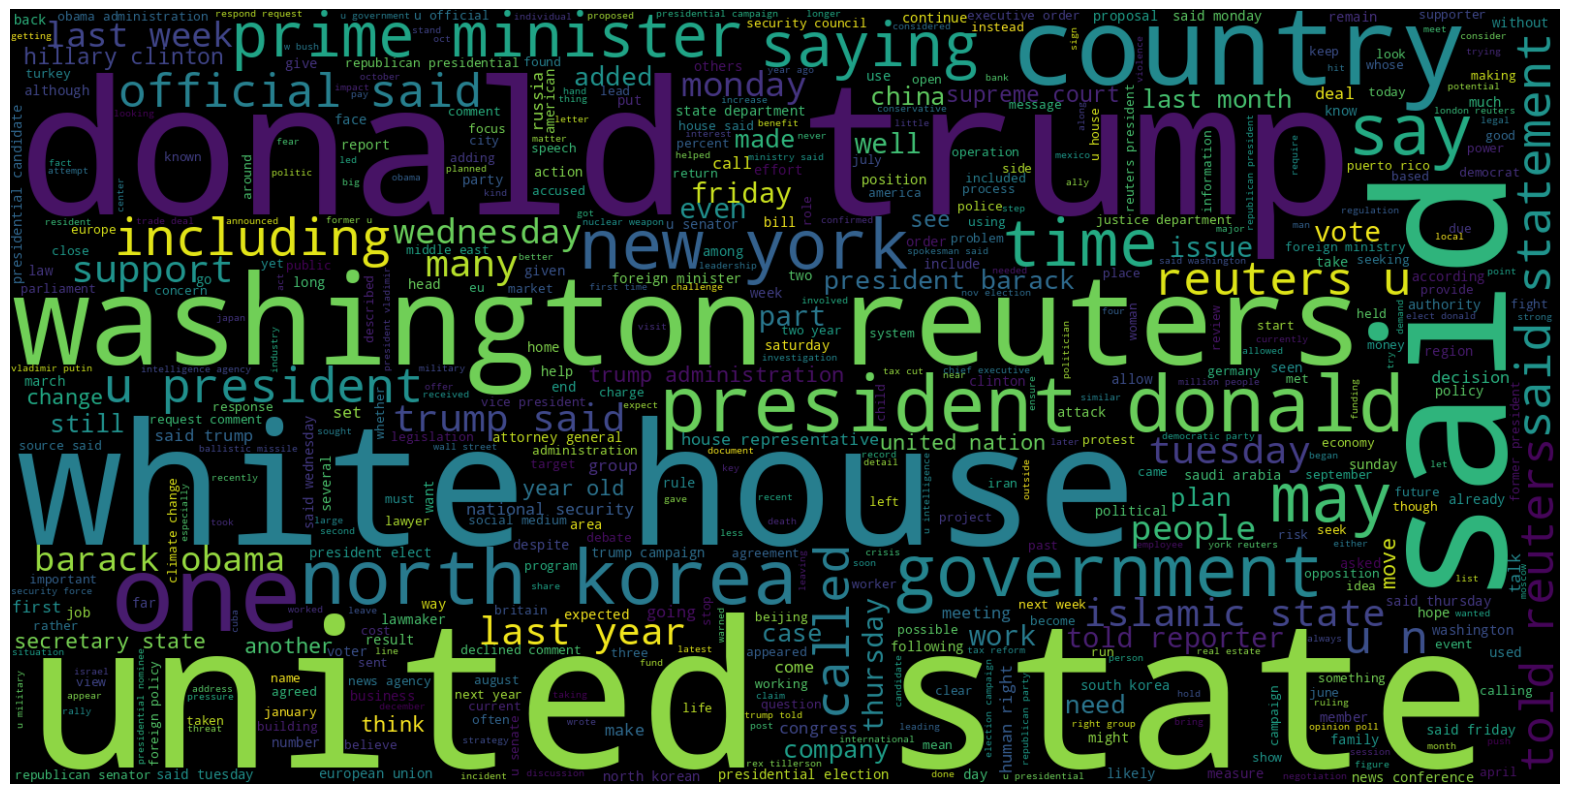

In [ ]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [ ]:
from PIL import Image


#creating a mask of thumb
thumb="/content/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

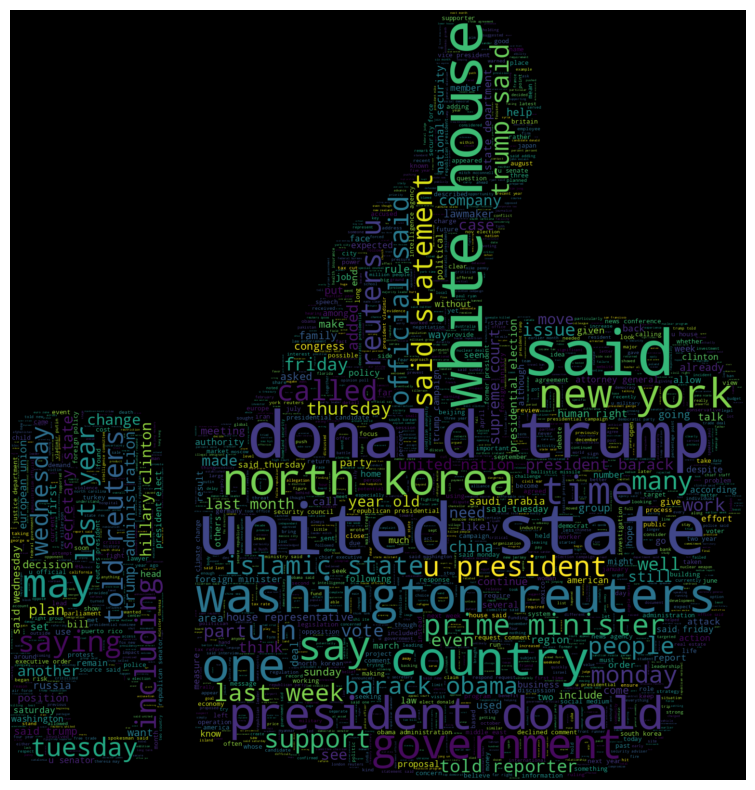

In [ ]:
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [ ]:
skull="/content/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

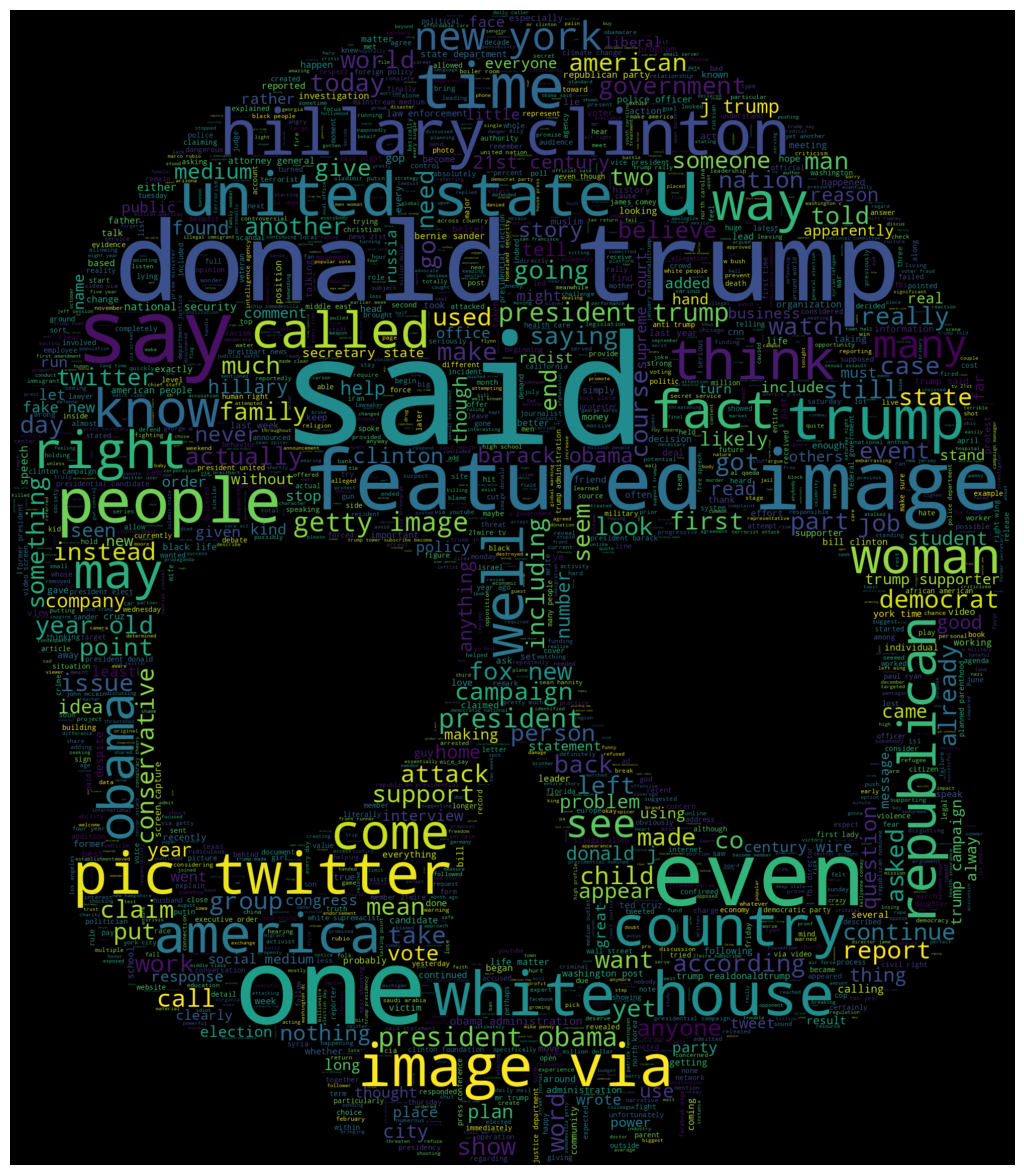

In [ ]:
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.category == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Assuming you have a DataFrame `df` with 'text' and 'label' columns
texts = df['text'].astype(str).tolist()
labels = df['category'].tolist()

# Encode labels (e.g., 'fake' -> 0, 'real' -> 1)
le = LabelEncoder()
labels = le.fit_transform(labels)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, padding='post', maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Embedding layer
model.add(Embedding(input_dim=10000, output_dim=100))  # input_dim = vocab size

# GRU layer (return sequences to feed into LSTM)
model.add(GRU(64, return_sequences=True))

# LSTM layer
model.add(LSTM(32))

# Dropout for regularization
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (fake/real)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.build(input_shape=(None, 100))  # input_length = 100 (sequence length)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 64)        │        31,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044,321 (3.98 MB)

 Trainable params: 1,044,321 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8421 - loss: 0.3158 - val_accuracy: 0.9674 - val_loss: 0.1041
Epoch 2/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9790 - loss: 0.0776 - val_accuracy: 0.9776 - val_loss: 0.0718
Epoch 3/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9911 - loss: 0.0328 - val_accuracy: 0.9782 - val_loss: 0.0677
Epoch 4/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9862 - val_loss: 0.0546
Epoch 5/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9980 - loss: 0.0098 - val_accuracy: 0.9863 - val_loss: 0.0572


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9856 - loss: 0.0599
Test Accuracy: 0.9863


In [ ]:
!pip install transformers
!pip install datasets
!pip install -q scikit-learn

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].tolist(), df['category'].tolist(), test_size=0.2)

train_dataset = NewsDataset(train_texts, train_labels, tokenizer)
test_dataset = NewsDataset(test_texts, test_labels, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

In [ ]:
class BERT_LSTM(nn.Module):
    def __init__(self, bert, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.bert = bert
        self.lstm = nn.LSTM(768, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        with torch.no_grad():
            bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
        lstm_out, _ = self.lstm(bert_output)
        out = self.dropout(lstm_out[:, -1, :])
        return self.fc(out)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

bert = BertModel.from_pretrained('bert-base-uncased')
model = BERT_LSTM(bert, hidden_dim=256, output_dim=2, n_layers=2, bidirectional=True, dropout=0.3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

for epoch in range(3):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")


100%|██████████| 2214/2214 [13:46<00:00,  2.68it/s]


Epoch 1, Loss: 0.3117


100%|██████████| 2214/2214 [13:14<00:00,  2.79it/s]


Epoch 2, Loss: 0.2181


100%|██████████| 2214/2214 [13:14<00:00,  2.79it/s]

Epoch 3, Loss: 0.2082


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Accuracy:", accuracy_score(all_labels, all_preds))
print(classification_report(all_labels, all_preds))


NameError: name 'model' is not defined

In [ ]:
pip install gradio

In [ ]:
def predict_news(text):
    model.eval()
    encoding = tokenizer(
        text,
        return_tensors='pt',
        max_length=256,
        padding='max_length',
        truncation=True
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask)
        pred = torch.argmax(outputs, dim=1).item()

    return "FAKE" if pred == 1 else "REAL"

In [ ]:
df['category'] = df['category'].map({'FAKE': 0, 'REAL': 1})


In [ ]:
def predict_single_news(news_text, tokenizer, model):
    model.eval()
    inputs = tokenizer(news_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        probs = torch.softmax(output, dim=1)
        pred = torch.argmax(probs, dim=1)

    label = "REAL" if pred.item() == 1 else "FAKE"
    confidence = probs[0][pred].item()

    print(f"Prediction: {label} (Confidence: {confidence:.2f})")
    return label



In [ ]:
import gradio as gr

iface = gr.Interface(fn=predict_news,
                     inputs=gr.Textbox(lines=5, placeholder="Enter news article..."),
                     outputs="text",
                     title="Fake News Detector (BERT + LSTM)",
                     description="Enter a news article to find out whether it's FAKE or REAL.")

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2e5d56869782565076.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


real

"UN warns of record-breaking global temperatures in upcoming year."

"Google launches AI-powered search features to enhance user experience."

"Japan successfully lands spacecraft on Moon’s surface."

"WHO declares end of COVID-19 global health emergency."

"Tesla opens its largest Gigafactory yet in Mexico."

"Meta releases new privacy tools for Instagram users under 18."

"India’s Chandrayaan-3 mission achieves soft landing near Moon's south pole."

"Microsoft to invest $10 billion in OpenAI for further AI research."

fake

Vaccines cause magnetism in the human body, new study finds."

"Scientists create dinosaur using chicken DNA in secret lab."

"5G towers linked to mass bird deaths worldwide."

"Time travel technology leaked from Area 51 documents."

"North Pole will completely melt by December 2025, ending winter forever."

"NASA to launch mission to block the Sun to cool the Earth."

"Drinking coffee before sleep gives superpowers, new research shows."

"Facebook to start charging $5/month to keep using your account."